In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets
from tensorflow import keras
from tensorflow.keras import layers

## 1. The XOR data


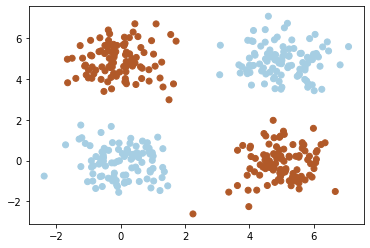

In [28]:
# We create four blobs with different centers to create the original data
centers = ([0, 0], [0, 5], [5, 0], [5, 5])
X, y = datasets.make_blobs(n_samples=400, centers = centers, cluster_std=0.8)
# Reduce the classes to two classe simulating the XOR problem 
y[y == 3] = 0
y[y == 2] = 1
# Plotting
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

In [51]:
my_first_neural_net = tf.keras.Sequential([
    layers.Input(shape=(2, ), name="input"),                                         
    layers.Dense(units=2, activation="relu", name="hidden"),
    layers.Dense(units=1, activation="sigmoid", name="output")
])

In [52]:
my_first_neural_net.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 2)                 6         
                                                                 
 output (Dense)              (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [53]:
tf.keras.utils.plot_model(my_first_neural_net, show_layer_names=True, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [54]:
my_first_neural_net.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [55]:
history = my_first_neural_net.fit(X, y, epochs=200, verbose=2)

Epoch 1/200


C:\Users\Vignesh Nambiar\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


13/13 - 1s - loss: 0.0000e+00 - accuracy: 0.5550 - 695ms/epoch - 53ms/step
Epoch 2/200
13/13 - 0s - loss: 0.0000e+00 - accuracy: 0.5725 - 24ms/epoch - 2ms/step
Epoch 3/200
13/13 - 0s - loss: 0.0000e+00 - accuracy: 0.5875 - 24ms/epoch - 2ms/step
Epoch 4/200
13/13 - 0s - loss: 0.0000e+00 - accuracy: 0.6000 - 28ms/epoch - 2ms/step
Epoch 5/200
13/13 - 0s - loss: 0.0000e+00 - accuracy: 0.6125 - 24ms/epoch - 2ms/step
Epoch 6/200
13/13 - 0s - loss: 0.0000e+00 - accuracy: 0.6300 - 28ms/epoch - 2ms/step
Epoch 7/200
13/13 - 0s - loss: 0.0000e+00 - accuracy: 0.6425 - 23ms/epoch - 2ms/step
Epoch 8/200
13/13 - 0s - loss: 0.0000e+00 - accuracy: 0.6550 - 29ms/epoch - 2ms/step
Epoch 9/200
13/13 - 0s - loss: 0.0000e+00 - accuracy: 0.6550 - 21ms/epoch - 2ms/step
Epoch 10/200
13/13 - 0s - loss: 0.0000e+00 - accuracy: 0.6575 - 29ms/epoch - 2ms/step
Epoch 11/200
13/13 - 0s - loss: 0.0000e+00 - accuracy: 0.6550 - 22ms/epoch - 2ms/step
Epoch 12/200
13/13 - 0s - loss: 0.0000e+00 - accuracy: 0.6225 - 22ms/epoc

In [56]:
test_results = my_first_neural_net.evaluate(X, y, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

13/13 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.5000
Test results - Loss: 0.0 - Accuracy: 50.0%


In [57]:
class Onehot2Int(object):

    def __init__(self, model):
        self.model = model

    def predict(self, X):
        y_pred = self.model.predict(X)
        return np.argmax(y_pred, axis=1)

In [58]:
my_first_neural_net_no_one = Onehot2Int(my_first_neural_net)

3888/3888 [==============================] - 5s 1ms/step


C:\Users\Vignesh Nambiar\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:315: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels, **contour_kwargs)


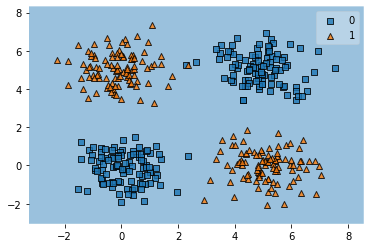

In [59]:
import numpy as np
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X, y, clf=my_first_neural_net_no_one)
plt.show()

In [25]:
!pip install mlxtend


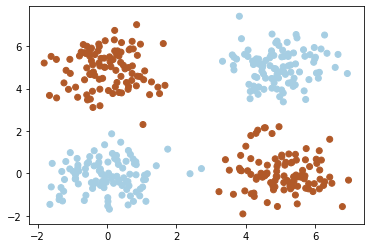

Epoch 1/100
13/13 [==============================] - 1s 2ms/step - loss: 0.6960 - accuracy: 0.4325
Epoch 2/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6954 - accuracy: 0.3850
Epoch 3/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6949 - accuracy: 0.4100
Epoch 4/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.4225
Epoch 5/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.4300
Epoch 6/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.4425
Epoch 7/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4500
Epoch 8/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.4550
Epoch 9/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.4575
Epoch 10/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.4625
Epoch 11/

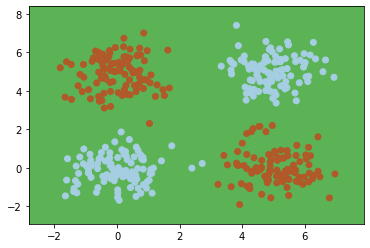

13/13 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5000
Test results - Loss: 0.6931506991386414 - Accuracy: 50.0%


In [64]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from tensorflow import keras

# Create the original data
centers = ([0, 0], [0, 5], [5, 0], [5, 5])
X, y = datasets.make_blobs(n_samples=400, centers=centers, cluster_std=0.8)

# Reduce the classes to two classes simulating the XOR problem
y[y == 3] = 0
y[y == 2] = 1

# Plot the data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.show()

# Convert the labels to categorical format for binary classification
y_binary = keras.utils.to_categorical(y, num_classes=2)

# Define and compile the binary classification model
model = keras.Sequential([
    keras.layers.Dense(8, input_dim=2, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X, y_binary, epochs=50, batch_size=32)

# Predict and plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.show()


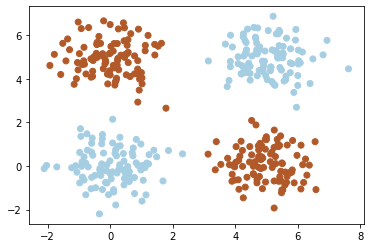

Epoch 1/50
13/13 [==============================] - 1s 4ms/step - loss: 1.4362 - accuracy: 0.5300
Epoch 2/50
13/13 [==============================] - 0s 3ms/step - loss: 1.3797 - accuracy: 0.5425
Epoch 3/50
13/13 [==============================] - 0s 2ms/step - loss: 1.3278 - accuracy: 0.5325
Epoch 4/50
13/13 [==============================] - 0s 3ms/step - loss: 1.2782 - accuracy: 0.5250
Epoch 5/50
13/13 [==============================] - 0s 3ms/step - loss: 1.2326 - accuracy: 0.5075
Epoch 6/50
13/13 [==============================] - 0s 2ms/step - loss: 1.1891 - accuracy: 0.5000
Epoch 7/50
13/13 [==============================] - 0s 3ms/step - loss: 1.1512 - accuracy: 0.5000
Epoch 8/50
13/13 [==============================] - 0s 3ms/step - loss: 1.1123 - accuracy: 0.4925
Epoch 9/50
13/13 [==============================] - 0s 2ms/step - loss: 1.0787 - accuracy: 0.4875
Epoch 10/50
13/13 [==============================] - 0s 2ms/step - loss: 1.0466 - accuracy: 0.4850
Epoch 11/50
13/13 [

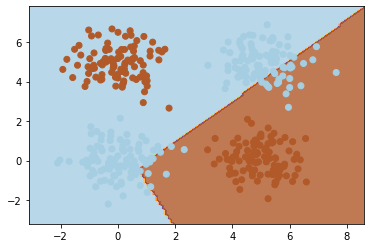

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from tensorflow import keras

# Create the original data
centers = ([0, 0], [0, 5], [5, 0], [5, 5])
X, y = datasets.make_blobs(n_samples=400, centers=centers, cluster_std=0.8)

# Reduce the classes to two classes simulating the XOR problem
y[y == 3] = 0
y[y == 2] = 1

# Plot the data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.show()

# Convert the labels to categorical format for binary classification
y_binary = keras.utils.to_categorical(y, num_classes=2)

# Define and compile the binary classification model
model = keras.Sequential([
    keras.layers.Dense(2, input_dim=2, activation='relu'),  # 2 input units
    keras.layers.Dense(2, activation='relu'),  # Hidden layer with 2 units
    keras.layers.Dense(2, activation='softmax')  # Output layer with 2 units
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X, y_binary, epochs=50, batch_size=32)

# Predict and plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.show()


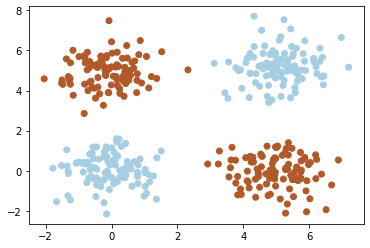

Epoch 1/100
13/13 [==============================] - 1s 2ms/step - loss: 0.6261 - accuracy: 0.5975
Epoch 2/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6208 - accuracy: 0.6200
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6161 - accuracy: 0.6300
Epoch 4/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6111 - accuracy: 0.6325
Epoch 5/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6064 - accuracy: 0.6325
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6018 - accuracy: 0.6350
Epoch 7/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5972 - accuracy: 0.6500
Epoch 8/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5928 - accuracy: 0.6500
Epoch 9/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5887 - accuracy: 0.6525
Epoch 10/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5847 - accuracy: 0.6525
Epoch 11/

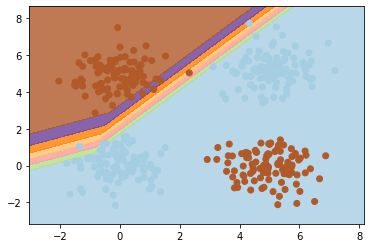

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from tensorflow import keras

# Create the original data
centers = ([0, 0], [0, 5], [5, 0], [5, 5])
X, y = datasets.make_blobs(n_samples=400, centers=centers, cluster_std=0.8)

# Reduce the classes to two classes simulating the XOR problem
y[y == 3] = 0
y[y == 2] = 1

# Plot the data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.show()

# Convert the labels to categorical format for binary classification
y_binary = keras.utils.to_categorical(y, num_classes=2)

# Define and compile the neural network model
model = keras.Sequential([
    keras.layers.Dense(2, input_dim=2, activation='relu'),
    keras.layers.Dense(2, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X, y, epochs=100, batch_size=32)

# Plot the decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.show()
